In [2]:
!pip install yfinance

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136948 sha256=cc9bad6bbc81e072efd0bc41115fb95418ee4106405918aa9b006ea13c8030b7
  Stored in directory: c:\users\shnkh\appdata\local\pip\cache\wheels\77\ca\43\00120282a2aa9323dd8da301fb17ea79f84c35fc6faa9f94ea
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling py

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.6.0 requires google-auth<2,>=1.6.3, but you have google-auth 2.6.0 which is incompatible.


In [3]:
!pip install pandas-ta

  Using cached pandas_ta-0.3.14b0-py3-none-any.whl


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

C:\Users\shnkh\anaconda3\envs\tf-gpu\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [5]:
df = pd.read_csv('../data/S & P 50/AAPL.csv')
df.head()

,date,open,high,low,close,volume
0,2018-01-02 00:00:00.000000,42.540001,43.075001,42.314999,43.064999,102223600.0
1,2018-01-03 00:00:00.000000,43.132500,43.637501,42.990002,43.057499,118071600.0
2,2018-01-04 00:00:00.000000,43.134998,43.367500,43.020000,43.257500,89738400.0
3,2018-01-05 00:00:00.000000,43.360001,43.842499,43.262501,43.750000,94640000.0
4,2018-01-08 00:00:00.000000,43.587502,43.902500,43.482498,43.587502,82271200.0


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [7]:
df.head()

,date,open,high,low,close,volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,102223600.0
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,118071600.0
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,89738400.0
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,94640000.0
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200.0


In [8]:
df = df.sort_values(by='date')
df.head()

,date,open,high,low,close,volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,102223600.0
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,118071600.0
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,89738400.0
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,94640000.0
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200.0


In [9]:
df.shape

(1259, 6)

In [10]:
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,date,open,high,low,close,volume
1254,2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900.0
1255,2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800.0
1256,2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400.0
1257,2022-12-29,127.989998,130.479996,127.730003,129.610001,75703700.0
1258,2022-12-30,128.410004,129.949997,127.430000,129.929993,77034200.0


In [11]:
df["RSI"] = ta.rsi(df.close, length=16)
df["CCI"] = ta.cci(df.high, df.low, df.close, length=16)
df["AO"] = ta.ao(df.high, df.low)
df["MOM"] = ta.mom(df.close, length=16)
a = ta.macd(df.close)
df = df.join(a)
df["ATR"] = ta.atr(df.high, df.low, df.close, length=16)
df["BOP"] = ta.bop(df.open, df.high, df.low, df.close, length=16)
df["RVI"] = ta.rvi(df.close)
a = ta.dm(df.high, df.low, length=16)
df = df.join(a)
a = ta.stoch(df.high, df.low, df.close)
df = df.join(a)
a = ta.stochrsi(df.close, length=16)
df = df.join(a)
df["WPR"] = ta.willr(df.high, df.low, df.close, length=16)
#print(ta.macd(df.close))
#help(ta.mom)
#help(ta.cci)
# Get all candle patterns (This is the default behaviour)
#df1 = df.ta.cdl_pattern(name="all")
# Get only one pattern
#df = df.ta.cdl_pattern(name="doji")
# Get some patterns
#df = df.ta.cdl_pattern(name=["doji", "inside"])
#df

In [12]:
df.tail()

,date,open,high,low,close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
1254,2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900.0,36.937162,-108.736705,-10.543499,-16.449997,...,4.492249,0.338131,25.555768,0.967588,1.448820,16.161728,15.640634,19.652155,15.543532,-89.567663
1255,2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800.0,35.145153,-108.097009,-10.966470,-17.779999,...,4.407733,-0.501861,21.497524,0.907114,1.415769,9.403822,13.969094,8.477254,14.624666,-94.099109
1256,2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400.0,31.581767,-121.334903,-11.266646,-20.590004,...,4.454749,-0.703488,17.827097,0.850419,1.505408,5.929970,10.498507,3.966516,10.698642,-99.294613
1257,2022-12-29,127.989998,130.479996,127.730003,129.610001,75703700.0,37.618190,-90.031965,-12.182087,-13.300003,...,4.453827,0.589094,31.284992,0.797268,1.411320,7.462915,7.598902,11.956632,8.133467,-84.481336
1258,2022-12-30,128.410004,129.949997,127.430000,129.929993,77034200.0,38.140006,-83.142467,-12.503764,-11.010010,...,4.332963,0.603171,41.961457,0.747439,1.341863,11.023494,8.138793,24.817302,13.580150,-83.153568


In [13]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

date                   0
open                   0
high                   0
low                    0
close                  0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
dtype: int64

In [14]:
df['prev_3d_price'] = df.close.shift(3)
df['fwd_3d_price'] = df.close.shift(-3)

df.dropna(inplace=True)

df['target_signal'] = np.where((df['close'] < df['prev_3d_price']) & (df['close'] < df['fwd_3d_price']), 1, 0)
df['target_signal'] = np.where((df['close'] > df['prev_3d_price']) & (df['close'] > df['fwd_3d_price']), -1, df['target_signal'])

df.head(10)

,date,open,high,low,close,volume,RSI,CCI,AO,MOM,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,prev_3d_price,fwd_3d_price,target_signal
36,2018-02-23,43.417500,43.912498,43.384998,43.875000,135249600.0,59.593541,108.381565,0.755147,2.017502,...,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,42.962502,44.529999,0
37,2018-02-26,44.087502,44.847500,44.052502,44.742500,152648800.0,63.475092,124.071017,0.953999,2.797501,...,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,42.767502,43.750000,-1
38,2018-02-27,44.775002,45.119999,44.540001,44.597500,155712400.0,62.406256,112.052327,1.244544,4.472500,...,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,43.125000,44.052502,-1
39,2018-02-28,44.814999,45.154999,44.512501,44.529999,151128400.0,61.888781,98.700140,1.545544,5.407497,...,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,43.875000,44.205002,-1
40,2018-03-01,44.634998,44.945000,43.165001,43.750000,195208000.0,56.149955,62.574562,1.696147,2.992500,...,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,44.742500,44.167500,1
41,2018-03-02,43.200001,44.075001,43.112499,44.052502,153816000.0,57.769884,49.498274,1.689669,4.167503,...,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,44.597500,43.757500,0
42,2018-03-05,43.802502,44.435001,43.630001,44.205002,113605600.0,58.592461,62.043787,1.608927,5.417503,...,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,44.529999,44.235001,1
43,2018-03-06,44.477501,44.562500,44.032501,44.167500,95154000.0,58.294610,68.652516,1.506655,5.064999,...,0.251969,0.236851,79.539926,81.688435,79.775957,82.176967,-17.092154,43.750000,44.994999,0
44,2018-03-07,43.735001,43.962502,43.567501,43.757500,126814000.0,55.032270,24.875934,1.308346,3.079998,...,0.235243,0.251995,69.865225,76.733588,68.675624,76.641353,-29.467559,44.052502,45.430000,1
45,2018-03-08,43.869999,44.279999,43.767502,44.235001,95096400.0,57.955288,45.710025,1.324743,3.150002,...,0.240682,0.235333,63.777958,71.061036,59.239204,69.230262,-20.744051,44.205002,44.992500,0


In [15]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

,date,open,high,low,close,volume,RSI,CCI,AO,MOM,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,prev_3d_price,fwd_3d_price,target_signal
0,2018-02-23,43.417500,43.912498,43.384998,43.875000,135249600.0,59.593541,108.381565,0.755147,2.017502,...,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,42.962502,44.529999,0
1,2018-02-26,44.087502,44.847500,44.052502,44.742500,152648800.0,63.475092,124.071017,0.953999,2.797501,...,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,42.767502,43.750000,-1
2,2018-02-27,44.775002,45.119999,44.540001,44.597500,155712400.0,62.406256,112.052327,1.244544,4.472500,...,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,43.125000,44.052502,-1
3,2018-02-28,44.814999,45.154999,44.512501,44.529999,151128400.0,61.888781,98.700140,1.545544,5.407497,...,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,43.875000,44.205002,-1
4,2018-03-01,44.634998,44.945000,43.165001,43.750000,195208000.0,56.149955,62.574562,1.696147,2.992500,...,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,44.742500,44.167500,1
5,2018-03-02,43.200001,44.075001,43.112499,44.052502,153816000.0,57.769884,49.498274,1.689669,4.167503,...,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,44.597500,43.757500,0
6,2018-03-05,43.802502,44.435001,43.630001,44.205002,113605600.0,58.592461,62.043787,1.608927,5.417503,...,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,44.529999,44.235001,1
7,2018-03-06,44.477501,44.562500,44.032501,44.167500,95154000.0,58.294610,68.652516,1.506655,5.064999,...,0.251969,0.236851,79.539926,81.688435,79.775957,82.176967,-17.092154,43.750000,44.994999,0
8,2018-03-07,43.735001,43.962502,43.567501,43.757500,126814000.0,55.032270,24.875934,1.308346,3.079998,...,0.235243,0.251995,69.865225,76.733588,68.675624,76.641353,-29.467559,44.052502,45.430000,1
9,2018-03-08,43.869999,44.279999,43.767502,44.235001,95096400.0,57.955288,45.710025,1.324743,3.150002,...,0.240682,0.235333,63.777958,71.061036,59.239204,69.230262,-20.744051,44.205002,44.992500,0


In [16]:
df.drop('index',axis=1,inplace=True)
df.tail()

KeyError: "['index'] not found in axis"

In [17]:
df.drop('date',axis=1,inplace=True)

In [18]:
df.head(10)

,open,high,low,close,volume,RSI,CCI,AO,MOM,MACD_12_26_9,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,prev_3d_price,fwd_3d_price,target_signal
0,43.417500,43.912498,43.384998,43.875000,135249600.0,59.593541,108.381565,0.755147,2.017502,-0.123171,...,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,42.962502,44.529999,0
1,44.087502,44.847500,44.052502,44.742500,152648800.0,63.475092,124.071017,0.953999,2.797501,0.073667,...,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,42.767502,43.750000,-1
2,44.775002,45.119999,44.540001,44.597500,155712400.0,62.406256,112.052327,1.244544,4.472500,0.215479,...,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,43.125000,44.052502,-1
3,44.814999,45.154999,44.512501,44.529999,151128400.0,61.888781,98.700140,1.545544,5.407497,0.318744,...,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,43.875000,44.205002,-1
4,44.634998,44.945000,43.165001,43.750000,195208000.0,56.149955,62.574562,1.696147,2.992500,0.333796,...,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,44.742500,44.167500,1
5,43.200001,44.075001,43.112499,44.052502,153816000.0,57.769884,49.498274,1.689669,4.167503,0.365915,...,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,44.597500,43.757500,0
6,43.802502,44.435001,43.630001,44.205002,113605600.0,58.592461,62.043787,1.608927,5.417503,0.399076,...,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,44.529999,44.235001,1
7,44.477501,44.562500,44.032501,44.167500,95154000.0,58.294610,68.652516,1.506655,5.064999,0.417517,...,0.251969,0.236851,79.539926,81.688435,79.775957,82.176967,-17.092154,43.750000,44.994999,0
8,43.735001,43.962502,43.567501,43.757500,126814000.0,55.032270,24.875934,1.308346,3.079998,0.394500,...,0.235243,0.251995,69.865225,76.733588,68.675624,76.641353,-29.467559,44.052502,45.430000,1
9,43.869999,44.279999,43.767502,44.235001,95096400.0,57.955288,45.710025,1.324743,3.150002,0.410062,...,0.240682,0.235333,63.777958,71.061036,59.239204,69.230262,-20.744051,44.205002,44.992500,0


In [19]:
data_set = df.drop(['prev_3d_price','target_signal'],axis=1)#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,open,high,low,close,volume,RSI,CCI,AO,MOM,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,fwd_3d_price
0,43.417500,43.912498,43.384998,43.875000,135249600.0,59.593541,108.381565,0.755147,2.017502,-0.123171,0.614496,-0.737667,1.028345,8.672992e-01,58.513532,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,44.529999
1,44.087502,44.847500,44.052502,44.742500,152648800.0,63.475092,124.071017,0.953999,2.797501,0.073667,0.649068,-0.575400,1.024501,8.238997e-01,65.166734,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,43.750000
2,44.775002,45.119999,44.540001,44.597500,155712400.0,62.406256,112.052327,1.244544,4.472500,0.215479,0.632703,-0.417224,0.994103,-3.060384e-01,54.492347,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,44.052502
3,44.814999,45.154999,44.512501,44.529999,151128400.0,61.888781,98.700140,1.545544,5.407497,0.318744,0.588775,-0.270031,0.970199,-4.435809e-01,45.891092,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,44.205002
4,44.634998,44.945000,43.165001,43.750000,195208000.0,56.149955,62.574562,1.696147,2.992500,0.333796,0.483061,-0.149265,1.024954,-4.971904e-01,39.757627,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,44.167500
5,43.200001,44.075001,43.112499,44.052502,153816000.0,57.769884,49.498274,1.689669,4.167503,0.365915,0.412145,-0.046229,1.020753,8.857138e-01,46.158493,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,43.757500
6,43.802502,44.435001,43.630001,44.205002,113605600.0,58.592461,62.043787,1.608927,5.417503,0.399076,0.356244,0.042832,1.006308,5.000000e-01,51.188247,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,44.235001
7,44.477501,44.562500,44.032501,44.167500,95154000.0,58.294610,68.652516,1.506655,5.064999,0.417517,0.299748,0.117769,0.974559,-5.849096e-01,47.198087,0.251969,0.236851,79.539926,81.688435,79.775957,82.176967,-17.092154,44.994999
8,43.735001,43.962502,43.567501,43.757500,126814000.0,55.032270,24.875934,1.308346,3.079998,0.394500,0.221385,0.173115,0.949696,5.695964e-02,44.101829,0.235243,0.251995,69.865225,76.733588,68.675624,76.641353,-29.467559,45.430000
9,43.869999,44.279999,43.767502,44.235001,95096400.0,57.955288,45.710025,1.324743,3.150002,0.410062,0.189558,0.220504,0.921448,7.122026e-01,47.987214,0.240682,0.235333,63.777958,71.061036,59.239204,69.230262,-20.744051,44.992500


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.05061889 0.05107159 0.05490181 ... 0.95491105 0.99438857 0.06132968]
 [0.05518807 0.05745341 0.05954952 ... 0.96797118 0.98588085 0.05600409]
 [0.05987658 0.05931335 0.06294389 ... 0.98218488 0.93115932 0.05806948]
 ...
 [0.67074711 0.6697836  0.66007524 ... 0.08992813 0.11130208 0.61785443]
 [0.64735565 0.6551771  0.65547976 ... 0.15543532 0.10435396 0.64222927]
 [0.65049273 0.64828341 0.64907398 ... 0.14624666 0.05902621 0.64441407]]


In [21]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(21):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

1220
[[[5.06188857e-02 5.10715860e-02 5.49018144e-02 ... 8.99274575e-01
   9.64318942e-01 9.54911051e-01]
  [5.51880674e-02 5.74534122e-02 5.95495194e-02 ... 9.29151035e-01
   9.90485821e-01 9.67971183e-01]
  [5.98765795e-02 5.93133472e-02 6.29438882e-02 ... 9.61645223e-01
   9.91749869e-01 9.82184877e-01]
  ...
  [3.56327076e-02 4.48604070e-02 3.96358534e-02 ... 1.60318044e-01
   3.95670168e-01 3.15952232e-01]
  [4.87605363e-02 4.86485463e-02 5.23604005e-02 ... 2.66953985e-01
   5.59509276e-01 4.17241336e-01]
  [4.60156245e-02 4.56624021e-02 4.56064577e-02 ... 3.61364092e-01
   6.02066889e-01 5.19082111e-01]]

 [[5.51880674e-02 5.74534122e-02 5.95495194e-02 ... 9.29151035e-01
   9.90485821e-01 9.67971183e-01]
  [5.98765795e-02 5.93133472e-02 6.29438882e-02 ... 9.61645223e-01
   9.91749869e-01 9.82184877e-01]
  [6.01493459e-02 5.95522377e-02 6.27524096e-02 ... 9.71805894e-01
   9.75844597e-01 9.86026762e-01]
  ...
  [4.87605363e-02 4.86485463e-02 5.23604005e-02 ... 2.66953985e-01
   5.

In [22]:
X.shape

(1190, 30, 21)

In [23]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

952
(952, 30, 21)
(238, 30, 21)
(952, 1)
(238, 1)


In [28]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 21), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
58/58 [==============================] - 6s 13ms/step - loss: 0.0143 - val_loss: 0.0022
Epoch 2/30
58/58 [==============================] - 0s 5ms/step - loss: 7.7434e-04 - val_loss: 0.0015
Epoch 3/30
58/58 [==============================] - 0s 5ms/step - loss: 7.8499e-04 - val_loss: 0.0013
Epoch 4/30
58/58 [==============================] - 0s 5ms/step - loss: 7.6065e-04 - val_loss: 0.0020
Epoch 5/30
58/58 [==============================] - 0s 6ms/step - loss: 7.0834e-04 - val_loss: 0.0011
Epoch 6/30
58/58 [==============================] - 0s 6ms/step - loss: 6.8159e-04 - val_loss: 0.0033
Epoch 7/30
58/58 [==============================] - 0s 6ms/step - loss: 9.8897e-04 - val_loss: 0.0012
Epoch 8/30
58/58 [==============================] - 0s 6ms/step - loss: 5.8668e-04 - val_loss: 0.0014
Epoch 9/30
58/58 [==============================] - 0s 6ms/step - loss: 6.2381e-04 - val_loss: 0.0012
Epoch 10/30
58/58 [==============================] - 0s 6ms/step - loss: 5.7147e-04 -

In [29]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

[0.9018972] [0.86617741]
[0.8882302] [0.86078348]
[0.8697573] [0.84822056]
[0.858006] [0.84760609]
[0.8421625] [0.84439707]
[0.8259703] [0.92025267]
[0.8133593] [0.95063586]
[0.7961079] [0.94947516]
[0.7872219] [0.95787319]
[0.82004225] [0.93779977]


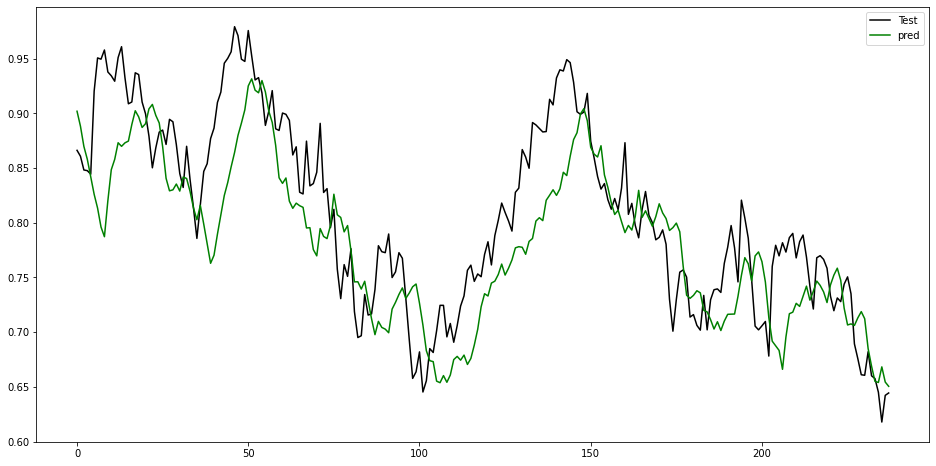

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()